<a href="https://colab.research.google.com/github/Nishit-singh/Enter-Week-1/blob/main/Gh_emission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Required Libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Step 2: Load Dataset

In [89]:
excel_file = 'https://github.com/Nishit-singh/Enter-Week-1/raw/refs/heads/main/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)

In [90]:
years[0]

2010

In [91]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [92]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [93]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [94]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [95]:
len(all_data)

7

In [96]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [97]:
len(df)

22092

Step 3: Data Preprocessing

In [98]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [99]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [100]:
df.dropna(inplace=True)

In [101]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    0 non-null      object 
 1   Name                                                    0 non-null      object 
 2   Substance                                               0 non-null      object 
 3   Unit                                                    0 non-null      object 
 4   Supply Chain Emission Factors without Margins           0 non-null      float64
 5   Margins of Supply Chain Emission Factors                0 non-null      float64
 6   Supply Chain Emission Factors with Margins              0 non-null      float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without Margins          0

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Margins of Supply Chain Emission Factors,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supply Chain Emission Factors with Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ ReliabilityScore of Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TemporalCorrelation of Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ DataCollection of Factors without Margins,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


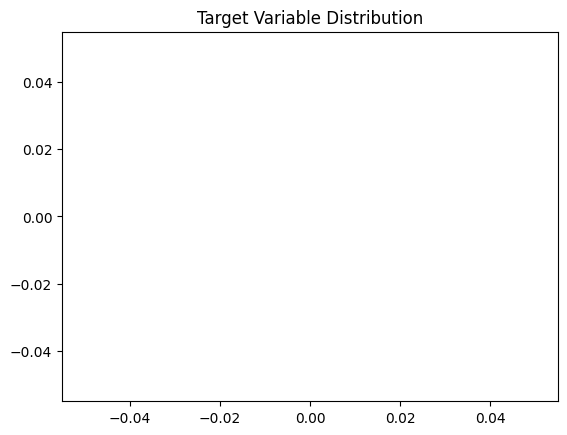

In [105]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [106]:
print(df['Substance'].value_counts())

Series([], Name: count, dtype: int64)


In [107]:
print(df['Unit'].value_counts())

Series([], Name: count, dtype: int64)


In [108]:
print(df['Unit'].unique())

[]


In [109]:
print(df['Source'].value_counts())

Series([], Name: count, dtype: int64)


In [110]:
df['Substance'].unique()

array([], dtype=object)

In [111]:

substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [112]:
df['Substance']=df['Substance'].map(substance_map)

In [113]:
df['Substance'].unique()

array([], dtype=int64)

In [114]:
print(df['Unit'].unique())

[]


In [115]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}

In [116]:
df['Unit']=df['Unit'].map(unit_map)

In [117]:
print(df['Unit'].unique())

[]


In [118]:
print(df['Source'].unique())

[]


In [119]:
source_map={'Commodity':0, 'Industry':1}

In [120]:
df['Source']=df['Source'].map(source_map)

In [121]:
print(df['Source'].unique())

[]


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    0 non-null      object 
 1   Name                                                    0 non-null      object 
 2   Substance                                               0 non-null      int64  
 3   Unit                                                    0 non-null      int64  
 4   Supply Chain Emission Factors without Margins           0 non-null      float64
 5   Margins of Supply Chain Emission Factors                0 non-null      float64
 6   Supply Chain Emission Factors with Margins              0 non-null      float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without Margins          0

In [123]:
df.Code.unique()

array([], dtype=object)

In [124]:
df.Name.unique()

array([], dtype=object)

In [125]:
len(df.Name.unique())

0

Top 10 Emmiting Industry

In [126]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)

top_emitters = top_emitters.reset_index()

In [127]:
top_emitters

,Name,Supply Chain Emission Factors with Margins


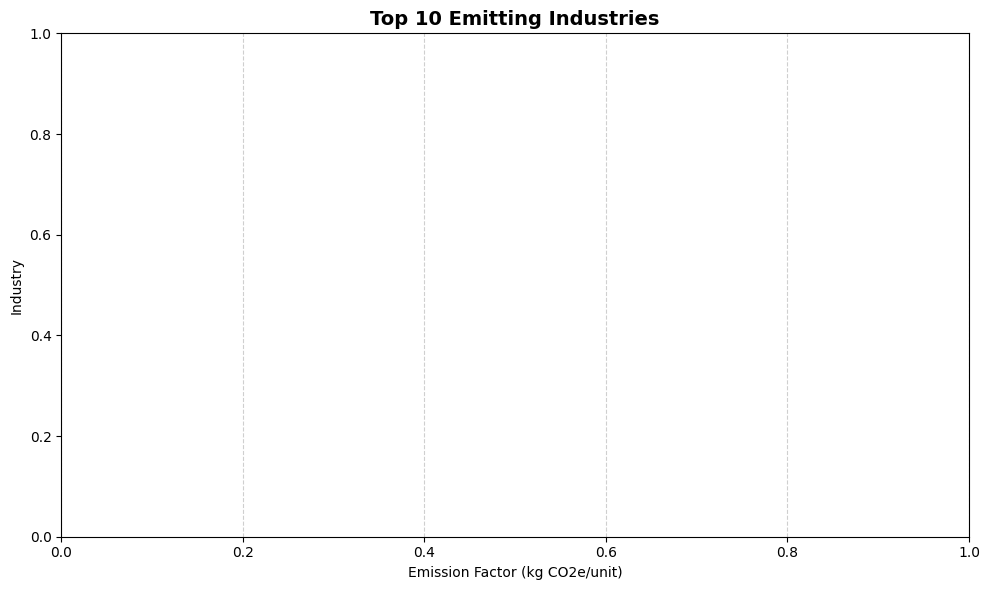

In [128]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='pastel'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

Drop non-numeric columns not needed,

Also drop Code and Year columns since there is no need of both of the columns

In [129]:
df.head(1)

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year


In [130]:
df.shape

(0, 15)